## Exercises

### 1. T-SNE on Wisconsin breast cancer data
Load the Wisconsin breast cancer data set from sklearn. 

Standardize the data and use t-SNE to visualize it. 

Use the 'target' (benign/malignant) to color the data points. 

In [1]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.preprocessing import StandardScaler
# define min max scaler
cancer_scaler = StandardScaler()
# transform data
cancer_scaled = cancer_scaler.fit_transform(cancer.data)

tsne = TSNE(n_components=2, verbose=0, perplexity=45, n_iter=1000, method = 'exact') # exact method can be used when number of samples is fairly low
tsne_results = tsne.fit_transform(cancer_scaled)

In [2]:
import pandas as pd
tsnedf = pd.DataFrame(tsne_results[:,:2], columns=["TSNE1", "TSNE2"])
tsnedf["true_label"] = cancer.target_names[cancer.target]

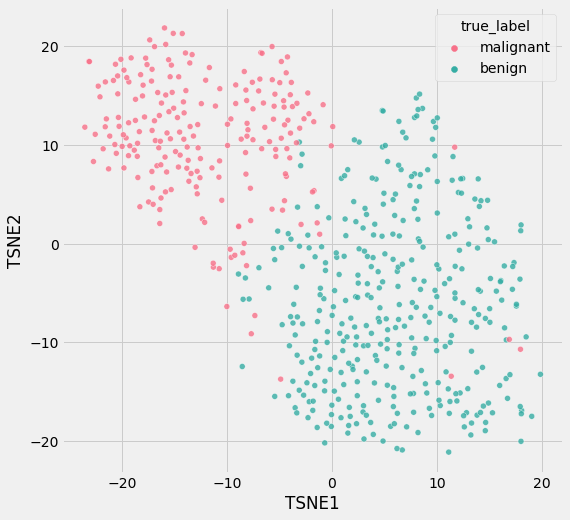

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))
sns.scatterplot(
    x = 'TSNE1', y = 'TSNE2', hue = 'true_label',
    palette = sns.color_palette("husl", 2),
    data = tsnedf,
    legend = "full",
    alpha = 0.8
)
plt.show()

You can try different perplexity settings, but most reasonable values (15-50) seem to work fine.

### 2. Breast cancer subtypes
Breast cancer is fairly well studied and the current scientific consensus is that there are five distinct molecular subtypes which exhibit different gene expression patterns (some are much rarer than others). 

Cluster BRCA samples from the pan-cancer TCGA data using *AgglomerativeClustering* for various numbers of clusters. Use a precomputed correlation distance matrix and the complete linkage method. 

Compute and plot the silhouette score as a function of the number of clusters. Are your findings consistent with the consensus?

#### Solution:

In [1]:
import pandas as pd

tcga_data = pd.read_csv('PS4/data.csv.zip')
tcga_labels = pd.read_csv('PS4/labels.csv', index_col = 0)

In [2]:
tcga_brca = tcga_data.loc[tcga_labels['Class'].to_numpy() == 'BRCA',:]

In [3]:
tcga_brca.shape

(300, 5000)

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
import numpy as np

brca_cor_dist = pairwise_distances(tcga_brca, metric='correlation')

#cluster2 = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete')
brca_hc_silh = []
brca_hc_k = np.arange(2,10)
for k in brca_hc_k:
    brca_hc = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='complete')
    brca_hc.fit(brca_cor_dist)
    brca_hc_silh.append(silhouette_score(brca_cor_dist, brca_hc.labels_, metric='precomputed'))

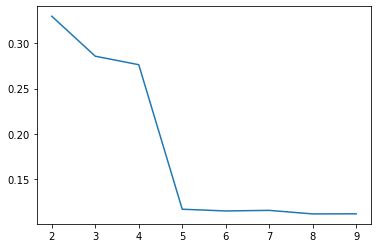

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.lineplot(x=brca_hc_k, y = brca_hc_silh)
plt.show()

According to the silhouette score, two is the best number of clusters. But seeing that the score decreases comparatively little before 5 clusters it could be argued that up to 4 clusters are worth investigating further. This aligns fairly well with the consensus: the basal-like subtype is named as such due to similarity to the expression profile of basal epithelial cells while luminal A and B have similiar expression patterns to luminal epithelium. Her2 overlaps mostly with the luminal subtypes. The normal-like is less frequent so there might be zero to a few samples in the data. Its molecular profile is also less distinguishable from the other subtypes which explains why we do not see a fifth cluster. Due to the similarities between luminal A/B and Her2, they do not separate well from each other but are distinguishable from basal-like cancers.